In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import sklearn as sk
import statsmodels

In [ ]:
Jadavpur_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spark4ai/RP/Data/Jadavpur_processed.csv")

In [ ]:
Jadavpur_df.drop(columns = ['Unnamed: 0', 'To Date'], axis=1, inplace=True)
Jadavpur_df = Jadavpur_df[:2976]
Jadavpur_df.tail()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,VWS
2971,NaN,139.670000,249.170000,22.670000,14.640000,25.830000,2.8700,6.330000,2.710000,5.070000,...,4.610000,0.410000,1.380000,0.280000,78.720000,0.34000,277.160000,16.200000,1008.500000,0.030000
2972,NaN,138.750000,250.700000,22.240000,14.760000,25.550000,2.9600,5.890000,2.700000,4.640000,...,4.680000,0.410000,1.390000,0.290000,70.910000,0.18000,276.450000,16.480000,1008.400000,0.020000
2973,NaN,137.750000,252.370000,21.830000,14.390000,25.020000,2.9100,5.890000,2.690000,6.440000,...,4.770000,0.410000,1.420000,0.280000,68.030000,0.35000,269.070000,16.770000,1008.400000,0.020000
2974,NaN,137.750000,252.370000,22.130000,13.800000,24.960000,2.7500,5.620000,2.640000,4.410000,...,4.820000,0.410000,1.420000,0.280000,64.250000,0.56000,270.210000,17.160000,1008.400000,0.030000
2975,NaN,51.588678,98.592673,16.495385,16.845875,30.098814,44.1191,5.473276,0.898116,27.208613,...,1.935962,0.232819,0.430723,0.120907,85.160994,0.37557,185.443624,99.554627,999.020655,-0.002363


In [ ]:
import pandas as pd
start_date = '2023-01-01 00:00:00'
end_date = '2023-01-31 23:45:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='15min')

Jadavpur_df['From Date'] = date_range

# Fill missing values in 'From Date' column with the next available date
Jadavpur_df['From Date'].fillna(method='ffill', inplace=True)
Jadavpur_df.tail()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,O-Xylene,RH,WS,WD,SR,BP,VWS
2971,2023-01-31 22:45:00,139.670000,249.170000,22.670000,14.640000,25.830000,2.8700,6.330000,2.710000,5.070000,...,4.610000,0.410000,1.380000,0.280000,78.720000,0.34000,277.160000,16.200000,1008.500000,0.030000
2972,2023-01-31 23:00:00,138.750000,250.700000,22.240000,14.760000,25.550000,2.9600,5.890000,2.700000,4.640000,...,4.680000,0.410000,1.390000,0.290000,70.910000,0.18000,276.450000,16.480000,1008.400000,0.020000
2973,2023-01-31 23:15:00,137.750000,252.370000,21.830000,14.390000,25.020000,2.9100,5.890000,2.690000,6.440000,...,4.770000,0.410000,1.420000,0.280000,68.030000,0.35000,269.070000,16.770000,1008.400000,0.020000
2974,2023-01-31 23:30:00,137.750000,252.370000,22.130000,13.800000,24.960000,2.7500,5.620000,2.640000,4.410000,...,4.820000,0.410000,1.420000,0.280000,64.250000,0.56000,270.210000,17.160000,1008.400000,0.030000
2975,2023-01-31 23:45:00,51.588678,98.592673,16.495385,16.845875,30.098814,44.1191,5.473276,0.898116,27.208613,...,1.935962,0.232819,0.430723,0.120907,85.160994,0.37557,185.443624,99.554627,999.020655,-0.002363


In [ ]:
import pandas as pd
Jadavpur_df = Jadavpur_df[["From Date", "PM2.5", "PM10"]]
Jadavpur_df["From Date"] = pd.to_datetime(Jadavpur_df["From Date"])
Jadavpur_df.set_index("From Date", inplace=True)
Jadavpur_df.tail()


<ipython-input-5-7b66200370f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jadavpur_df["From Date"] = pd.to_datetime(Jadavpur_df["From Date"])


,PM2.5,PM10
From Date,,
2023-01-31 22:45:00,139.670000,249.170000
2023-01-31 23:00:00,138.750000,250.700000
2023-01-31 23:15:00,137.750000,252.370000
2023-01-31 23:30:00,137.750000,252.370000
2023-01-31 23:45:00,51.588678,98.592673


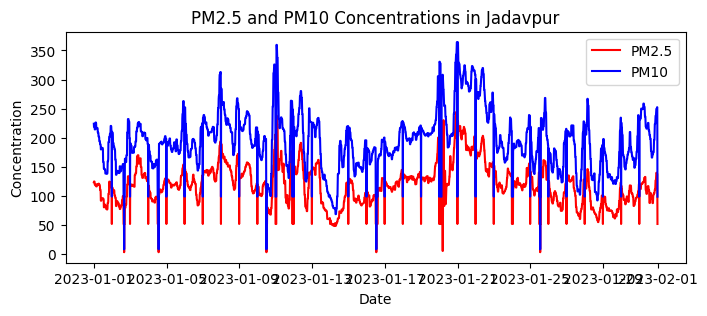

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns to be plotted
pm25_data = Jadavpur_df["PM2.5"]
pm10_data = Jadavpur_df["PM10"]

# Create the plot
plt.figure(figsize=(8, 3))

# Plot the PM2.5 data
plt.plot(pm25_data, color="red", label="PM2.5")

# Plot the PM10 data
plt.plot(pm10_data, color="blue", label="PM10")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("PM2.5 and PM10 Concentrations in Jadavpur")

# Show the plot
plt.show()


In [ ]:
Jadavpur_df.describe()

,PM2.5,PM10
count,2976.000000,2976.000000
mean,119.460777,194.656623
std,35.468063,50.814021
min,3.000000,8.000000
25%,96.000000,164.957500
50%,119.140000,193.885000
75%,138.550000,219.840000
max,244.440000,364.190000


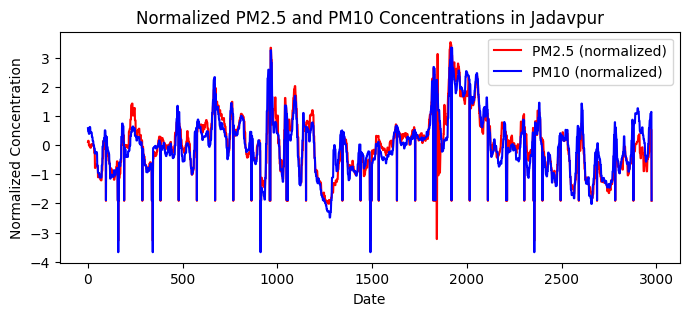

In [ ]:
import matplotlib.pyplot as plt
# Z-score normalization
from sklearn.preprocessing import StandardScaler

# Normalize the PM2.5 and PM10 data
scaler = StandardScaler()
normalized_pm25 = scaler.fit_transform(Jadavpur_df["PM2.5"].values.reshape(-1, 1))
normalized_pm10 = scaler.fit_transform(Jadavpur_df["PM10"].values.reshape(-1, 1))

# Create the plot
plt.figure(figsize=(8, 3))

# Plot the normalized PM2.5 data
plt.plot(normalized_pm25, color="red", label="PM2.5 (normalized)")

# Plot the normalized PM10 data
plt.plot(normalized_pm10, color="blue", label="PM10 (normalized)")

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Normalized Concentration")
plt.title("Normalized PM2.5 and PM10 Concentrations in Jadavpur")

# Show the plot
plt.show()


In [ ]:
Jadavpur_df["PM2.5_normalized"] = normalized_pm25
Jadavpur_df["PM10_normalized"] = normalized_pm10
Jadavpur_df.head()


,PM2.5,PM10,PM2.5_normalized,PM10_normalized
From Date,,,,
2023-01-01 00:00:00,123.28,224.03,0.107699,0.578154
2023-01-01 00:15:00,124.61,218.47,0.145204,0.468717
2023-01-01 00:30:00,124.61,218.47,0.145204,0.468717
2023-01-01 00:45:00,124.61,218.47,0.145204,0.468717
2023-01-01 01:00:00,123.88,217.91,0.124618,0.457694


In [ ]:
Jadavpur_df_normalized = Jadavpur_df.copy()
Jadavpur_df_normalized["PM2.5"] = Jadavpur_df_normalized["PM2.5_normalized"]
Jadavpur_df_normalized["PM10"] = Jadavpur_df_normalized["PM10_normalized"]
Jadavpur_df_normalized.head()

,PM2.5,PM10,PM2.5_normalized,PM10_normalized
From Date,,,,
2023-01-01 00:00:00,0.107699,0.578154,0.107699,0.578154
2023-01-01 00:15:00,0.145204,0.468717,0.145204,0.468717
2023-01-01 00:30:00,0.145204,0.468717,0.145204,0.468717
2023-01-01 00:45:00,0.145204,0.468717,0.145204,0.468717
2023-01-01 01:00:00,0.124618,0.457694,0.124618,0.457694


In [ ]:
Jadavpur_df_normalized.drop(columns =['PM2.5','PM10'], inplace= True)
Jadavpur_df_normalized.head()

,PM2.5_normalized,PM10_normalized
From Date,,
2023-01-01 00:00:00,0.107699,0.578154
2023-01-01 00:15:00,0.145204,0.468717
2023-01-01 00:30:00,0.145204,0.468717
2023-01-01 00:45:00,0.145204,0.468717
2023-01-01 01:00:00,0.124618,0.457694


In [ ]:
for column in Jadavpur_df_normalized.columns:
    result = adfuller(Jadavpur_df_normalized[column])
    print(f"Augmented Dickey-Fuller Test for {column}:")
    labels = ['ADF Statistic', 'p-value', '#Lags', 'No. of Observations Used']
    for i, j in zip(result, labels):
        print(f"{j:25} = {i}")

Augmented Dickey-Fuller Test for PM2.5_normalized:
ADF Statistic             = -5.528864326379367
p-value                   = 1.8065611755067865e-06
#Lags                     = 11
No. of Observations Used  = 2964
Augmented Dickey-Fuller Test for PM10_normalized:
ADF Statistic             = -6.469566480856875
p-value                   = 1.3779304679380892e-08
#Lags                     = 7
No. of Observations Used  = 2968


In [ ]:
import matplotlib.pyplot as plt
# Calculate the weighted rolling mean for PM2.5 and PM10
pm25_rolling_mean = Jadavpur_df_normalized["PM2.5_normalized"].rolling(window=12, min_periods=1, center=True).mean()
pm10_rolling_mean = Jadavpur_df_normalized["PM10_normalized"].rolling(window=12, min_periods=1, center=True).mean()

# Subtract the weighted rolling mean from the original time series
Jadavpur_df_normalized["PM2.5_detrended"] = Jadavpur_df_normalized["PM2.5_normalized"] - pm25_rolling_mean
Jadavpur_df_normalized["PM10_detrended"] = Jadavpur_df_normalized["PM10_normalized"] - pm10_rolling_mean

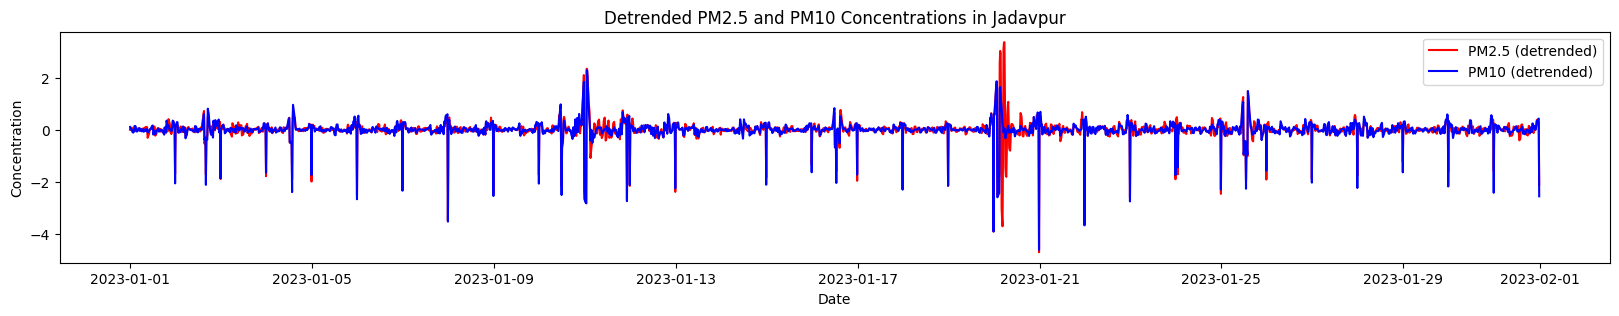

In [ ]:
# Plot the detrended time series
plt.figure(figsize=(20, 3))
plt.plot(Jadavpur_df_normalized["PM2.5_detrended"], color="red", label="PM2.5 (detrended)")
plt.plot(Jadavpur_df_normalized["PM10_detrended"], color="blue", label="PM10 (detrended)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Detrended PM2.5 and PM10 Concentrations in Jadavpur")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the variance for each time step
Jadavpur_df_normalized["PM2.5_variance"] = Jadavpur_df_normalized["PM2.5_detrended"].rolling(window=12, min_periods=1, center=True).var()
Jadavpur_df_normalized["PM10_variance"] = Jadavpur_df_normalized["PM10_detrended"].rolling(window=12, min_periods=1, center=True).var()

# Divide the detrended time series by the square root of the variance
Jadavpur_df_normalized["PM2.5_stationary"] = Jadavpur_df_normalized["PM2.5_detrended"] / np.sqrt(Jadavpur_df_normalized["PM2.5_variance"])
Jadavpur_df_normalized["PM10_stationary"] = Jadavpur_df_normalized["PM10_detrended"] / np.sqrt(Jadavpur_df_normalized["PM10_variance"])




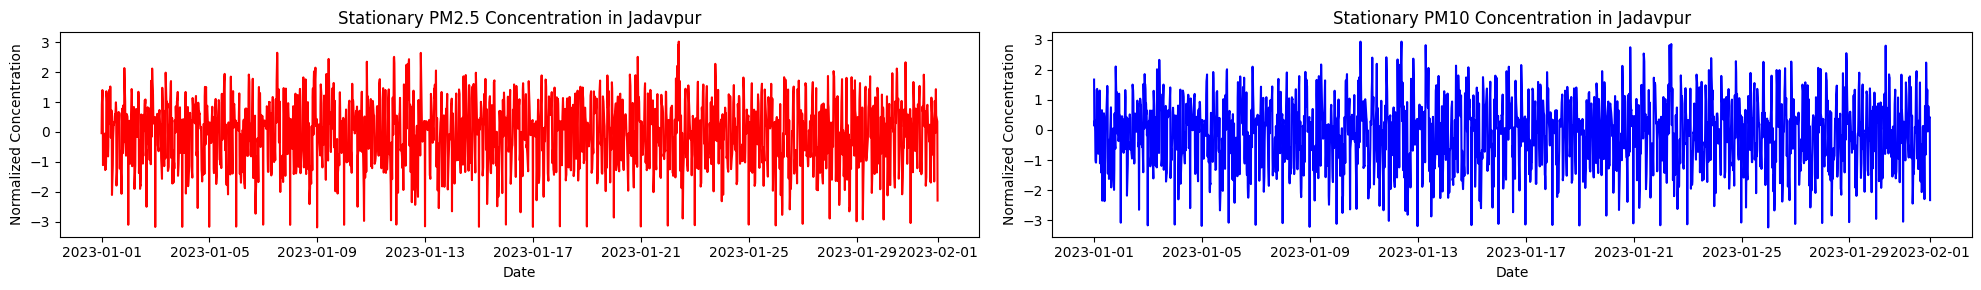

In [ ]:
import matplotlib.pyplot as plt
# Plot the stationary PM2.5 and PM10 time series
plt.figure(figsize=(20, 3))

# Subplot for PM2.5
plt.subplot(1, 2, 1)
plt.plot(Jadavpur_df_normalized["PM2.5_stationary"], color="red")
plt.xlabel("Date")
plt.ylabel("Normalized Concentration")
plt.title("Stationary PM2.5 Concentration in Jadavpur")

# Subplot for PM10
plt.subplot(1, 2, 2)
plt.plot(Jadavpur_df_normalized["PM10_stationary"], color="blue")
plt.xlabel("Date")
plt.ylabel("Normalized Concentration")
plt.title("Stationary PM10 Concentration in Jadavpur")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
Jadavpur_df_final = Jadavpur_df_normalized

In [ ]:
Jadavpur_df_final.head()

,PM2.5_normalized,PM10_normalized,PM2.5_detrended,PM10_detrended,PM2.5_variance,PM10_variance,PM2.5_stationary,PM10_stationary
From Date,,,,,,,,
2023-01-01 00:00:00,0.107699,0.578154,-0.002115,0.107009,0.002729,0.004077,-0.040483,1.675939
2023-01-01 00:15:00,0.145204,0.468717,0.052370,0.009898,0.003233,0.005266,0.921049,0.136393
2023-01-01 00:30:00,0.145204,0.468717,0.065105,0.019142,0.003170,0.005745,1.156405,0.252543
2023-01-01 00:45:00,0.145204,0.468717,0.075636,0.022876,0.002912,0.005327,1.401746,0.313442
2023-01-01 01:00:00,0.124618,0.457694,0.067170,-0.005432,0.002823,0.007307,1.264169,-0.063553


In [ ]:
# Split the data into train and test sets
train_data = Jadavpur_df_final[:2200]
test_data = Jadavpur_df_final[2200:]

# Print the shapes of the train and test sets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (2200, 8)
Test data shape: (776, 8)


In [ ]:
for column in Jadavpur_df_final.columns:
    result = adfuller(Jadavpur_df_final[column])
    print(f"Augmented Dickey-Fuller Test for {column}:")
    labels = ['ADF Statistic', 'p-value', '#Lags', 'No. of Observations Used']
    for i, j in zip(result, labels):
        print(f"{j:25} = {i}")

Augmented Dickey-Fuller Test for PM2.5_normalized:
ADF Statistic             = -5.528864326379367
p-value                   = 1.8065611755067865e-06
#Lags                     = 11
No. of Observations Used  = 2964
Augmented Dickey-Fuller Test for PM10_normalized:
ADF Statistic             = -6.469566480856875
p-value                   = 1.3779304679380892e-08
#Lags                     = 7
No. of Observations Used  = 2968
Augmented Dickey-Fuller Test for PM2.5_detrended:
ADF Statistic             = -19.391527044701707
p-value                   = 0.0
#Lags                     = 18
No. of Observations Used  = 2957
Augmented Dickey-Fuller Test for PM10_detrended:
ADF Statistic             = -18.291016649950233
p-value                   = 2.297338465699606e-30
#Lags                     = 19
No. of Observations Used  = 2956
Augmented Dickey-Fuller Test for PM2.5_variance:
ADF Statistic             = -8.054747052889683
p-value                   = 1.7043986743679673e-12
#Lags                   

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

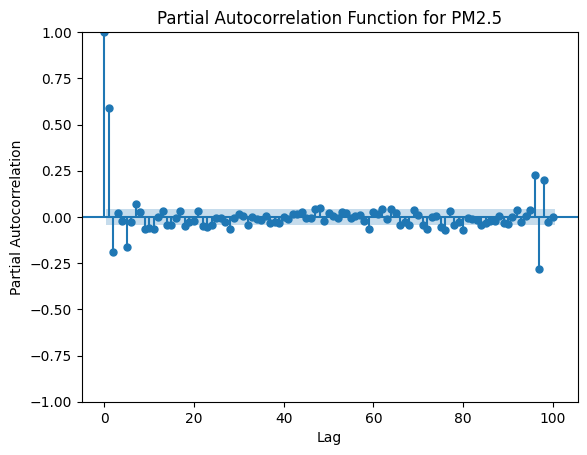

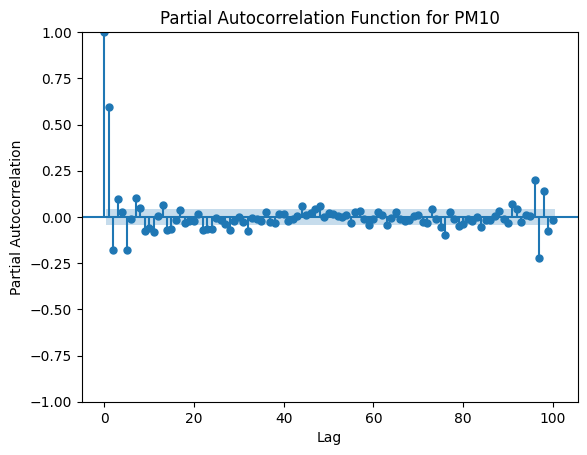

In [ ]:
# Plot the partial autocorrelation function for PM2.5
plot_pacf(train_data["PM2.5_stationary"], lags=100)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function for PM2.5")
plt.show()

# Plot the partial autocorrelation function for PM10
plot_pacf(train_data["PM10_stationary"], lags=100)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function for PM10")
plt.show()


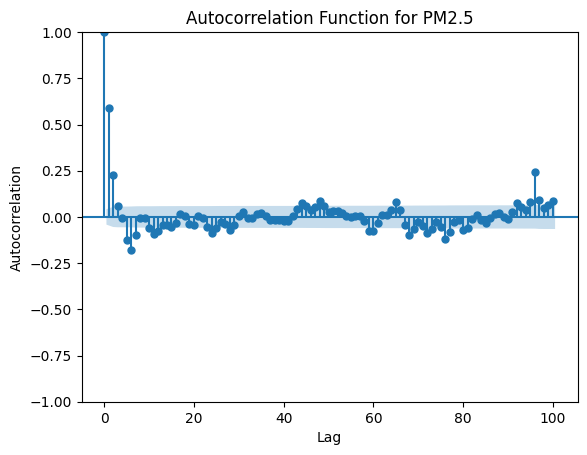

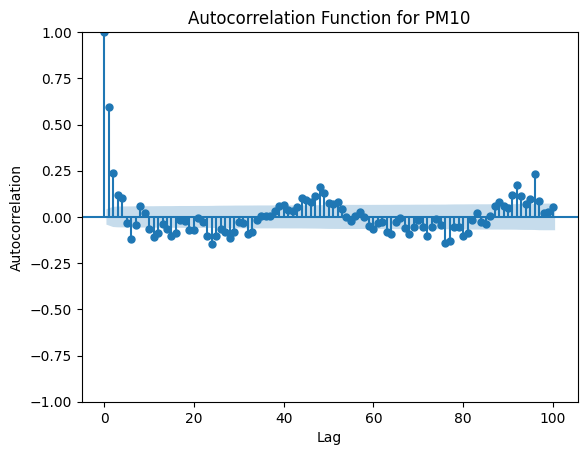

In [ ]:
# Plot the autocorrelation function for PM2.5
plot_acf(train_data["PM2.5_stationary"], lags=100)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function for PM2.5")
plt.show()

# Plot the autocorrelation function for PM10
plot_acf(train_data["PM10_stationary"], lags=100)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function for PM10")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_pm25 = statsmodels.tsa.statespace.sarimax.SARIMAX(train_data["PM2.5_detrended"], order=(0, 1, 0), seasonal_order=(1, 0, 1, 96))
results_pm25 = model_pm25.fit(disp=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_pm25 = results_pm25.forecast(len(test_data))


In [ ]:
forecast_pm25

2023-01-23 22:00:00    0.071373
2023-01-23 22:15:00   -0.060099
2023-01-23 22:30:00    0.248273
2023-01-23 22:45:00    0.231572
2023-01-23 23:00:00    0.199776
                         ...   
2023-01-31 22:45:00    0.173337
2023-01-31 23:00:00    0.142411
2023-01-31 23:15:00    0.142780
2023-01-31 23:30:00    0.172214
2023-01-31 23:45:00   -2.466518
Freq: 15T, Name: predicted_mean, Length: 776, dtype: float64

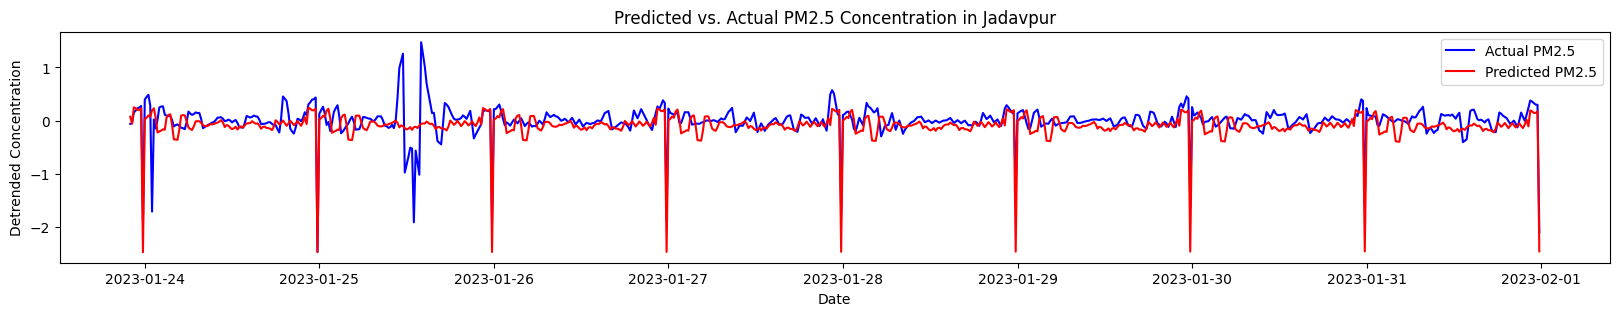

In [ ]:
# Plot the predicted and actual values for PM2.5
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM2.5_detrended"], color="blue", label="Actual PM2.5")
plt.plot(forecast_pm25, color="red", label="Predicted PM2.5")
plt.xlabel("Date")
plt.ylabel("Detrended Concentration")
plt.title("Predicted vs. Actual PM2.5 Concentration in Jadavpur")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_pm25 = np.sqrt(mean_squared_error(test_data["PM2.5_detrended"], forecast_pm25))
print("Root Mean Squared Error for PM2.5:", rmse_pm25)


Root Mean Squared Error for PM2.5: 0.2517531743763786


In [ ]:
# #uncomment this cell to save your model
# import pickle

# # Save the model to a file
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model_pm25, file)



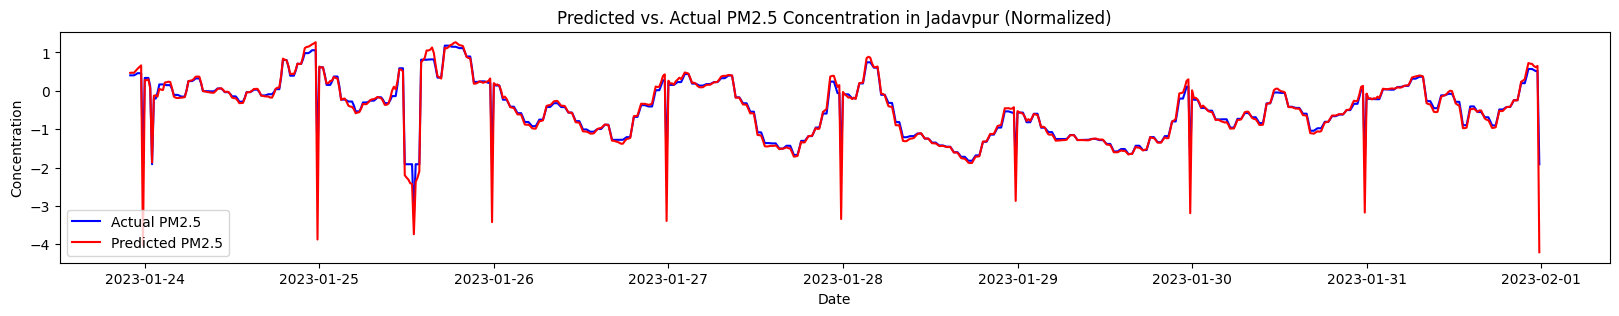

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Inverse transform the forecast to obtain the original scale
forecast_pm25_norm = forecast_pm25 * np.sqrt(Jadavpur_df_normalized["PM2.5_variance"]) + Jadavpur_df_normalized["PM2.5_detrended"].rolling(window=12, min_periods=1, center=True).mean() + Jadavpur_df_normalized["PM2.5_normalized"]

# Plot the predicted and actual values for PM10 on the original scale
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM2.5_normalized"], color="blue", label="Actual PM2.5")
plt.plot(forecast_pm25_norm, color="red", label="Predicted PM2.5")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Predicted vs. Actual PM2.5 Concentration in Jadavpur (Normalized)")
plt.legend()
plt.show()

In [ ]:
test_data['PM2.5'] = Jadavpur_df['PM2.5'][2200:]

<ipython-input-32-add845469b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PM2.5'] = Jadavpur_df['PM2.5'][2200:]


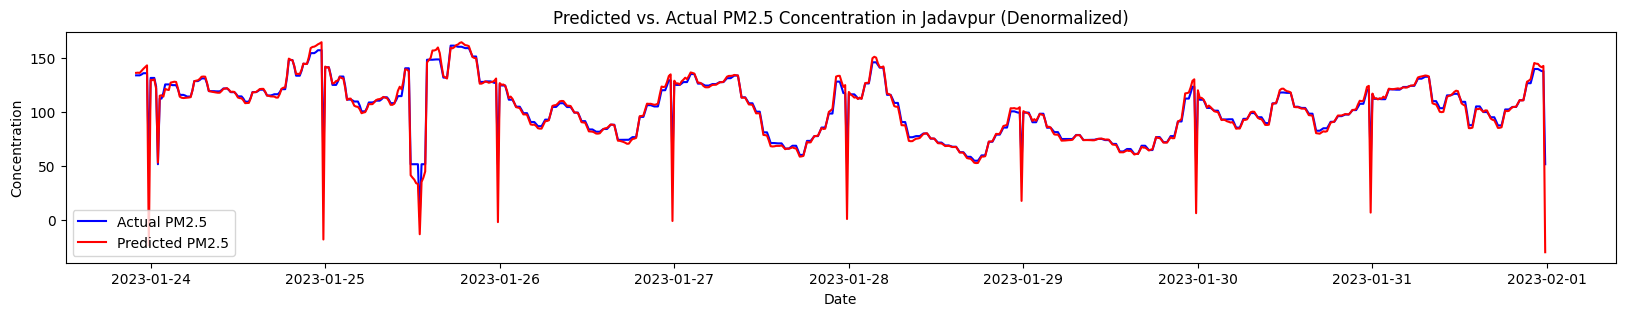

In [ ]:
import matplotlib.pyplot as plt
def reverse_z_score_normalization(normalized_values, mean, std):
  """
  Reverses the z-score normalization on a set of values.

  Args:
    normalized_values: A list or array of normalized values.
    mean: The mean value used for normalization.
    std: The standard deviation used for normalization.

  Returns:
    A list or array of denormalized values.
  """

  denormalized_values = normalized_values * std + mean
  return denormalized_values

# Get the mean and standard deviation used for normalization
mean_pm25 = Jadavpur_df["PM2.5"].mean()
std_pm25 = Jadavpur_df["PM2.5"].std()

# Reverse the z-score normalization on the forecast values
forecast_pm25_denormalized = reverse_z_score_normalization(forecast_pm25_norm, mean_pm25, std_pm25)

# Plot the predicted and actual values for PM10 on the original scale
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM2.5"], color="blue", label="Actual PM2.5")
plt.plot(forecast_pm25_denormalized, color="red", label="Predicted PM2.5")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Predicted vs. Actual PM2.5 Concentration in Jadavpur (Denormalized)")
plt.legend()
plt.show()

In [ ]:
model_pm10 = statsmodels.tsa.statespace.sarimax.SARIMAX(train_data["PM10_detrended"], order=(0, 1, 0), seasonal_order=(1, 0, 1, 96))
results_pm10 = model_pm10.fit(disp=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [ ]:
# Make predictions on the test data
forecast_pm10 = results_pm10.forecast(len(test_data))

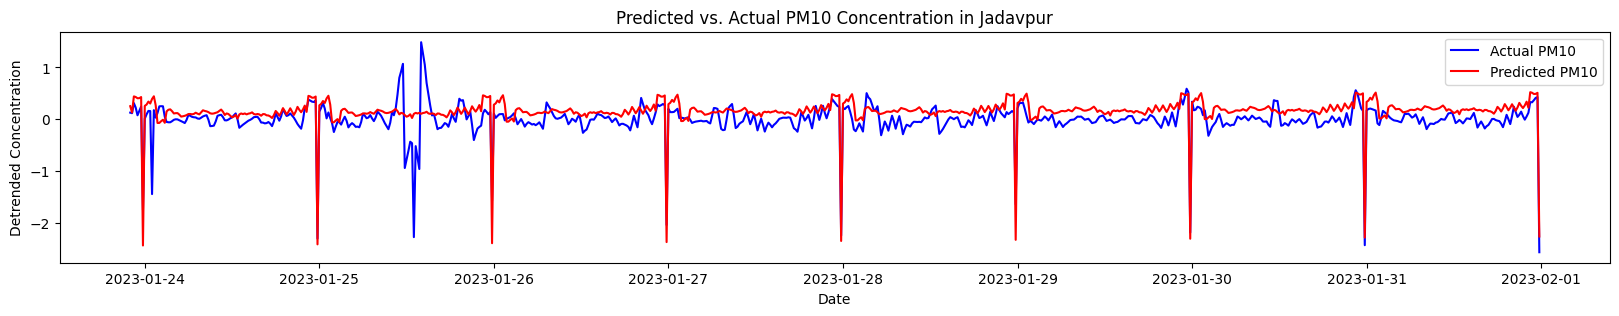

In [ ]:
# Plot the predicted and actual values for PM10
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM10_detrended"], color="blue", label="Actual PM10")
plt.plot(forecast_pm10, color="red", label="Predicted PM10")
plt.xlabel("Date")
plt.ylabel("Detrended Concentration")
plt.title("Predicted vs. Actual PM10 Concentration in Jadavpur")
plt.legend()
plt.show()

In [ ]:
# calculate rmse

import numpy as np
from sklearn.metrics import mean_squared_error

rmse_pm10 = np.sqrt(mean_squared_error(test_data["PM2.5_detrended"], forecast_pm10))
print("Root Mean Squared Error for PM10:", rmse_pm10)

Root Mean Squared Error for PM10: 0.27621615479051725


In [ ]:
# #uncomment this cell to save your model
# import pickle

# # Save the model to a file
# with open('model_pm10.pkl', 'wb') as file:
#     pickle.dump(model_pm10, file)

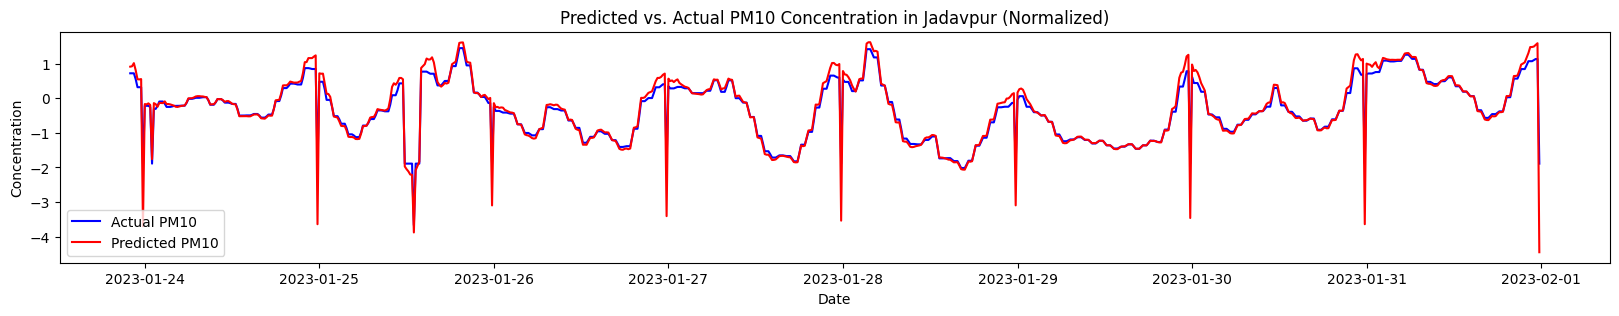

In [ ]:
# reverse the transformations on forecast_pm10

import matplotlib.pyplot as plt
import numpy as np
# Inverse transform the forecast to obtain the original scale
forecast_pm10_norm = forecast_pm10 * np.sqrt(Jadavpur_df_normalized["PM10_variance"]) + Jadavpur_df_normalized["PM10_detrended"].rolling(window=12, min_periods=1, center=True).mean() + Jadavpur_df_normalized["PM10_normalized"]

# Plot the predicted and actual values for PM10 on the original scale
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM10_normalized"], color="blue", label="Actual PM10")
plt.plot(forecast_pm10_norm, color="red", label="Predicted PM10")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Predicted vs. Actual PM10 Concentration in Jadavpur (Normalized)")
plt.legend()
plt.show()


In [ ]:
forecast_pm10_norm

2023-01-01 00:00:00         NaN
2023-01-01 00:15:00         NaN
2023-01-01 00:30:00         NaN
2023-01-01 00:45:00         NaN
2023-01-01 01:00:00         NaN
                         ...   
2023-01-31 22:45:00    1.483285
2023-01-31 23:00:00    1.497323
2023-01-31 23:15:00    1.546498
2023-01-31 23:30:00    1.593006
2023-01-31 23:45:00   -4.454714
Length: 2976, dtype: float64

In [ ]:

test_data['PM10'] = Jadavpur_df['PM10'][2200:]


<ipython-input-41-584459a7629d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PM10'] = Jadavpur_df['PM10'][2200:]


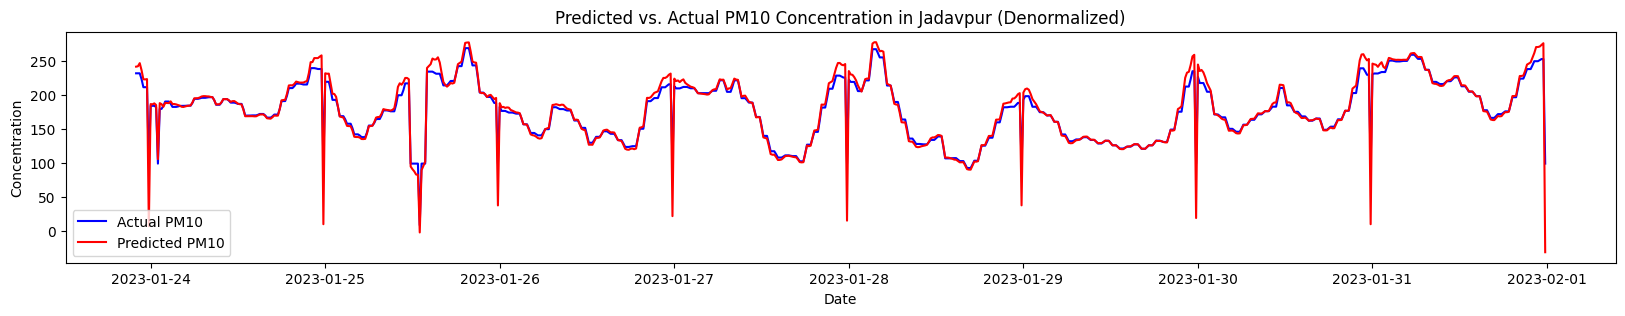

In [ ]:
import matplotlib.pyplot as plt
def reverse_z_score_normalization(normalized_values, mean, std):
  """
  Reverses the z-score normalization on a set of values.

  Args:
    normalized_values: A list or array of normalized values.
    mean: The mean value used for normalization.
    std: The standard deviation used for normalization.

  Returns:
    A list or array of denormalized values.
  """

  denormalized_values = normalized_values * std + mean
  return denormalized_values

# Get the mean and standard deviation used for normalization
mean_pm10 = Jadavpur_df["PM10"].mean()
std_pm10 = Jadavpur_df["PM10"].std()

# Reverse the z-score normalization on the forecast values
forecast_pm10_denormalized = reverse_z_score_normalization(forecast_pm10_norm, mean_pm10, std_pm10)

# Plot the predicted and actual values for PM10 on the original scale
plt.figure(figsize=(20, 3))
plt.plot(test_data["PM10"], color="blue", label="Actual PM10")
plt.plot(forecast_pm10_denormalized, color="red", label="Predicted PM10")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.title("Predicted vs. Actual PM10 Concentration in Jadavpur (Denormalized)")
plt.legend()
plt.show()
